<a href="https://colab.research.google.com/github/gleiciny/myapp/blob/main/Atividade_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Acurácia: 1.00
Matriz de Confusão:
[[106   0]
 [  0  44]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00        44

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



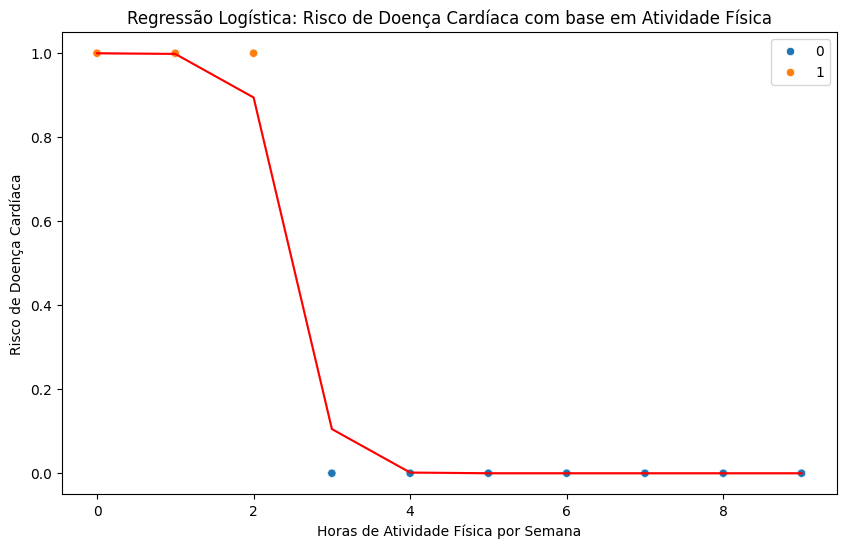

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Gerando dados simulados
np.random.seed(42)
num_samples = 500
hours_of_activity = np.random.randint(0, 10, num_samples)
heart_disease_risk = (hours_of_activity < 3).astype(int)  # Simulação de risco baseado em poucas horas de atividade

# Criando um DataFrame
data = pd.DataFrame({
    'hours_of_activity': hours_of_activity,
    'heart_disease_risk': heart_disease_risk
})

# Dividindo os dados em conjunto de treino e teste
X = data[['hours_of_activity']]
y = data['heart_disease_risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinando o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Acurácia: {accuracy:.2f}')
print('Matriz de Confusão:')
print(conf_matrix)
print('Relatório de Classificação:')
print(class_report)

# Plotando os dados e a linha de decisão do modelo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hours_of_activity', y='heart_disease_risk', data=data, hue='heart_disease_risk')
sns.lineplot(x=X_test['hours_of_activity'], y=model.predict_proba(X_test)[:, 1], color='red')
plt.xlabel('Horas de Atividade Física por Semana')
plt.ylabel('Risco de Doença Cardíaca')
plt.title('Regressão Logística: Risco de Doença Cardíaca com base em Atividade Física')
plt.show()
